In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.ensemble import RandomForestClassifier

분류 or 회귀? => 회귀 => 자전거 대여량 예측 문제

In [2]:
train = pd.read_csv("data/bike-sharing-demand/train.csv", parse_dates=["datetime"])
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [5]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

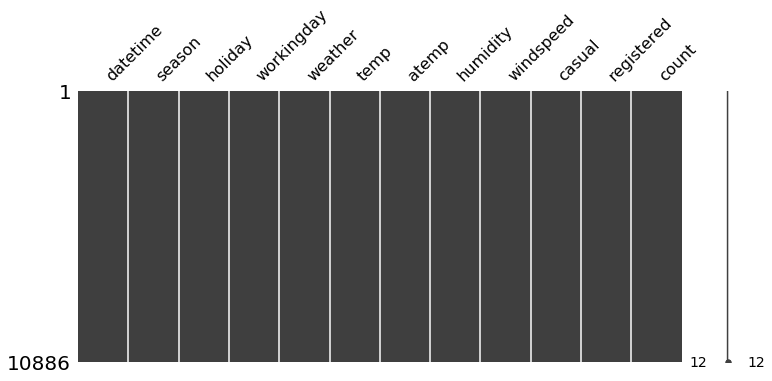

In [6]:
import missingno as msno
msno.matrix(train, figsize=(12, 5))

In [7]:
train.datetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
5       2011-01-01 05:00:00
6       2011-01-01 06:00:00
7       2011-01-01 07:00:00
8       2011-01-01 08:00:00
9       2011-01-01 09:00:00
10      2011-01-01 10:00:00
11      2011-01-01 11:00:00
12      2011-01-01 12:00:00
13      2011-01-01 13:00:00
14      2011-01-01 14:00:00
15      2011-01-01 15:00:00
16      2011-01-01 16:00:00
17      2011-01-01 17:00:00
18      2011-01-01 18:00:00
19      2011-01-01 19:00:00
20      2011-01-01 20:00:00
21      2011-01-01 21:00:00
22      2011-01-01 22:00:00
23      2011-01-01 23:00:00
24      2011-01-02 00:00:00
25      2011-01-02 01:00:00
26      2011-01-02 02:00:00
27      2011-01-02 03:00:00
28      2011-01-02 04:00:00
29      2011-01-02 06:00:00
                ...        
10856   2012-12-18 18:00:00
10857   2012-12-18 19:00:00
10858   2012-12-18 20:00:00
10859   2012-12-18 21:00:00
10860   2012-12-18 2

In [8]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


시각화

(<Figure size 432x288 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D31F3E5A20>,
       dtype=object))

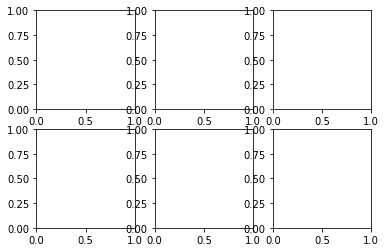

In [9]:
plt.subplots(nrows=2, ncols=3)

* 출력 결과 인수가 2개인 array 객체로 출력된다. 첫번째 인자는 figure 객체임을 알려주고, 두번째 인wk는 array를 나타낸다.

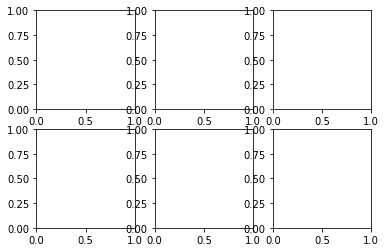

In [10]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

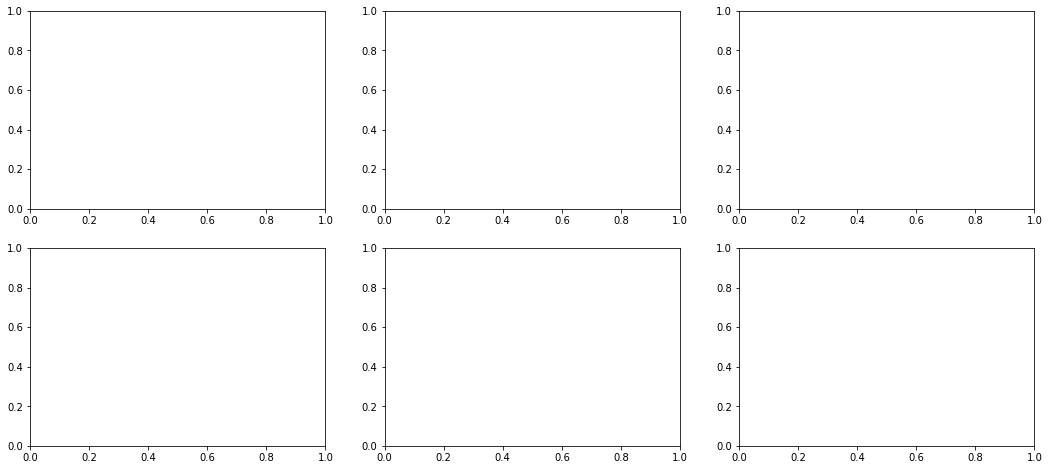

In [11]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(18, 8)

[Text(0.5, 1.0, '시간별 대여량')]

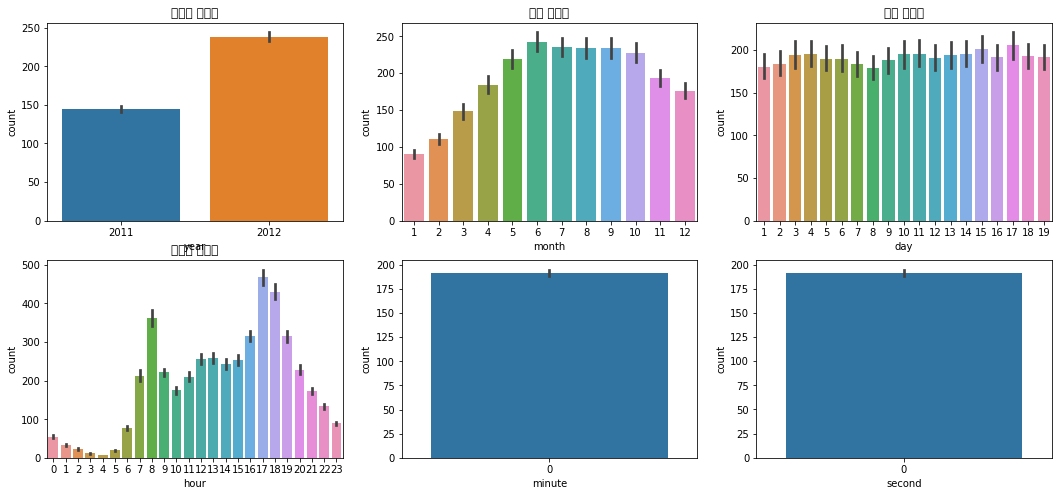

In [12]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(18, 8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

ax1.set(title="연도별 대여량")
ax2.set(title="월별 대여량")
ax3.set(title="일별 대여량")
ax4.set(title="시간별 대여량")

boxplot 형태 (계절별)

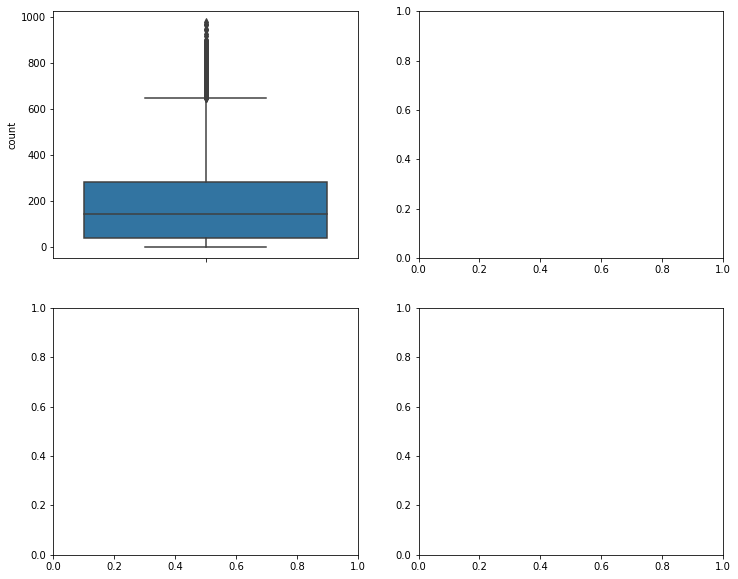

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train, y="count", ax=axes[0][0])

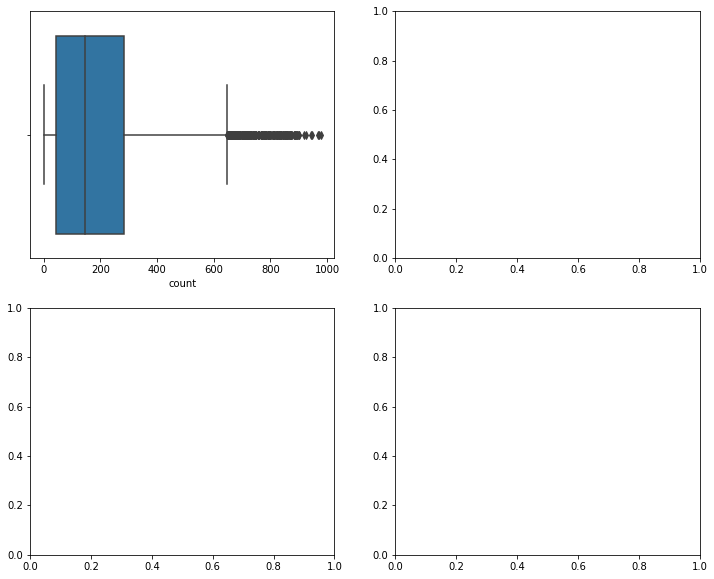

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train, y="count", ax=axes[0][0], orient="h")

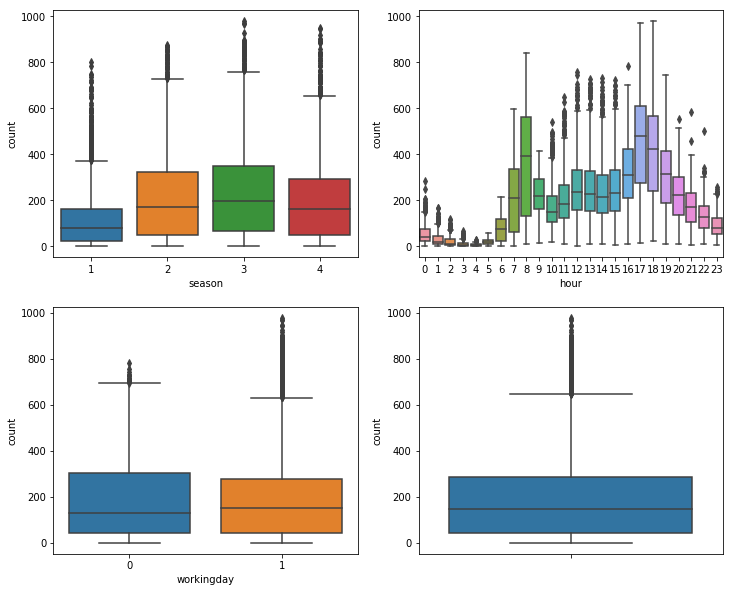

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train, y="count", ax=axes[0][0], orient="v", x="season")
sns.boxplot(data=train, y="count", ax=axes[0][1], orient="v", x="hour")
sns.boxplot(data=train, y="count", ax=axes[1][0], orient="v", x="workingday")
sns.boxplot(data=train, y="count", ax=axes[1][1], orient="v")    # 순수 대여량

In [16]:
train["dayofweek"] = train["datetime"].dt.dayofweek    # day of week은 0 (월요일) ~ 6 (일요일) 까지
train["dayofweek"]

0        5
1        5
2        5
3        5
4        5
5        5
6        5
7        5
8        5
9        5
10       5
11       5
12       5
13       5
14       5
15       5
16       5
17       5
18       5
19       5
20       5
21       5
22       5
23       5
24       6
25       6
26       6
27       6
28       6
29       6
        ..
10856    1
10857    1
10858    1
10859    1
10860    1
10861    1
10862    2
10863    2
10864    2
10865    2
10866    2
10867    2
10868    2
10869    2
10870    2
10871    2
10872    2
10873    2
10874    2
10875    2
10876    2
10877    2
10878    2
10879    2
10880    2
10881    2
10882    2
10883    2
10884    2
10885    2
Name: dayofweek, Length: 10886, dtype: int64

In [17]:
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

꺾은선 그래프

시간의 흐름에 따른 그래프 (0~23),

근무일 여부에 따른 그래프 (0, 1),

요일에 따른 그래프 (0~6),

날씨에 따른 그래프 (1~4),

계절에 따른 그래프 (1~4)

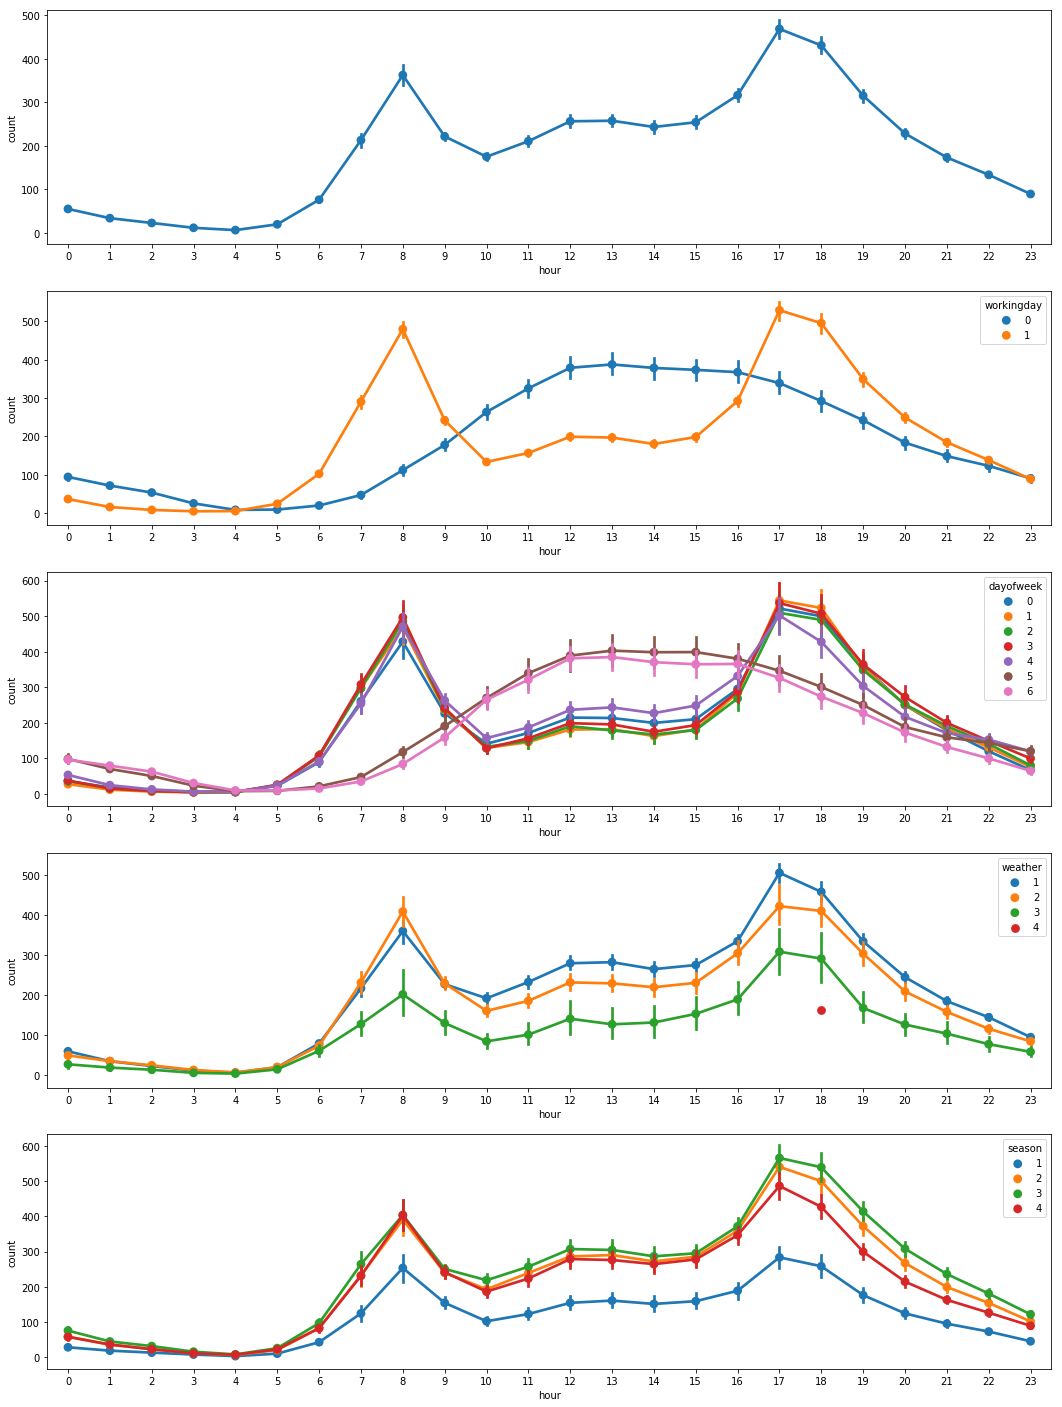

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax=ax1)    # 각 시간대별 카운트의 합
sns.pointplot(data=train, x="hour", y="count", ax=ax2, hue="workingday")
sns.pointplot(data=train, x="hour", y="count", ax=ax3, hue="dayofweek")
sns.pointplot(data=train, x="hour", y="count", ax=ax4, hue="weather")
sns.pointplot(data=train, x="hour", y="count", ax=ax5, hue="season")

상관계수 구하기

피어슨 상관계수

In [19]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [20]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt

,temp,atemp,casual,registered,humidity,windspeed,count
0,9.84,14.395,3,13,81,0.0000,16
1,9.02,13.635,8,32,80,0.0000,40
2,9.02,13.635,5,27,80,0.0000,32
3,9.84,14.395,3,10,75,0.0000,13
4,9.84,14.395,0,1,75,0.0000,1
5,9.84,12.880,0,1,75,6.0032,1
6,9.02,13.635,2,0,80,0.0000,2
7,8.20,12.880,1,2,86,0.0000,3
8,9.84,14.395,1,7,75,0.0000,8
9,13.12,17.425,8,6,76,0.0000,14


In [21]:
corrMatt = corrMatt.corr()

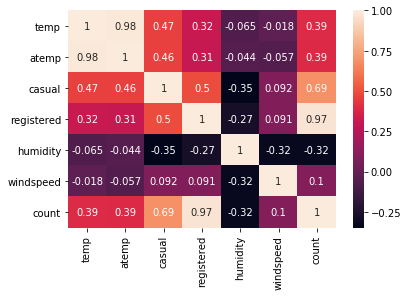

In [23]:
sns.heatmap(corrMatt, annot=True)

In [27]:
mask = np.array(corrMatt)
mask

array([[ 1.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.98494811,  1.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.46709706,  0.46206654,  1.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.31857128,  0.31463539,  0.49724969,  1.        , -0.26545787,
         0.09105166,  0.97094811],
       [-0.06494877, -0.04353571, -0.3481869 , -0.26545787,  1.        ,
        -0.31860699, -0.31737148],
       [-0.01785201, -0.057473  ,  0.09227619,  0.09105166, -0.31860699,
         1.        ,  0.10136947],
       [ 0.39445364,  0.38978444,  0.69041357,  0.97094811, -0.31737148,
         0.10136947,  1.        ]])

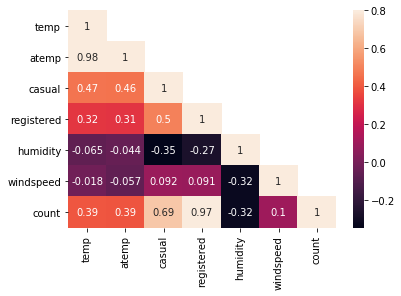

In [30]:
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask, annot=True, vmax=0.8)

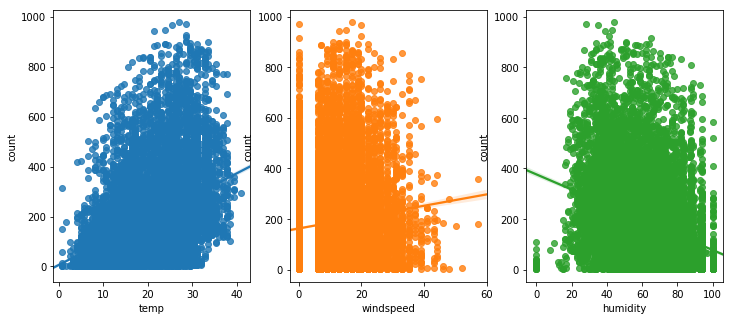

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=train, ax=ax1)
sns.regplot(x="windspeed", y="count", data=train, ax=ax2)
sns.regplot(x="humidity", y="count", data=train, ax=ax3)

년도별, 월별로 나눠서 시각화

In [33]:
def cym(dtime):
    return "{0}-{1}".format(dtime.year, dtime.month)

train["year_month"] = train["datetime"].apply(cym)
train["year_month"]

0         2011-1
1         2011-1
2         2011-1
3         2011-1
4         2011-1
5         2011-1
6         2011-1
7         2011-1
8         2011-1
9         2011-1
10        2011-1
11        2011-1
12        2011-1
13        2011-1
14        2011-1
15        2011-1
16        2011-1
17        2011-1
18        2011-1
19        2011-1
20        2011-1
21        2011-1
22        2011-1
23        2011-1
24        2011-1
25        2011-1
26        2011-1
27        2011-1
28        2011-1
29        2011-1
          ...   
10856    2012-12
10857    2012-12
10858    2012-12
10859    2012-12
10860    2012-12
10861    2012-12
10862    2012-12
10863    2012-12
10864    2012-12
10865    2012-12
10866    2012-12
10867    2012-12
10868    2012-12
10869    2012-12
10870    2012-12
10871    2012-12
10872    2012-12
10873    2012-12
10874    2012-12
10875    2012-12
10876    2012-12
10877    2012-12
10878    2012-12
10879    2012-12
10880    2012-12
10881    2012-12
10882    2012-12
10883    2012-

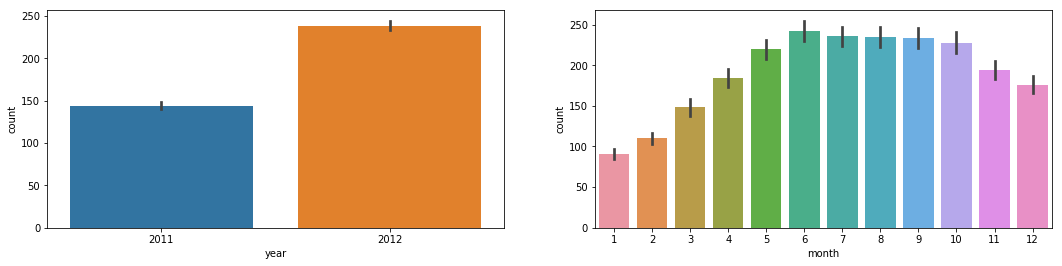

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(18, 4)
sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)

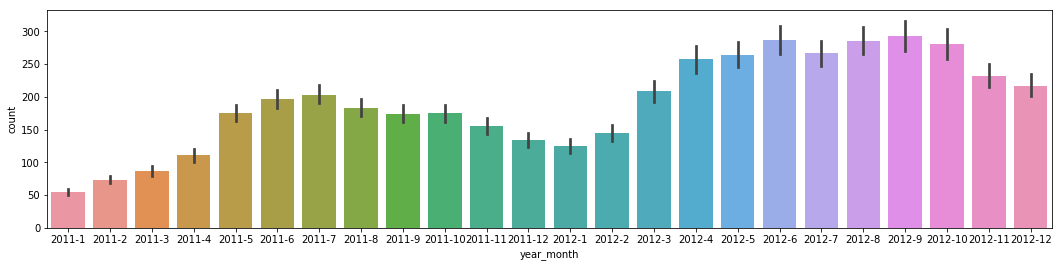

In [35]:
fig, ax3 = plt.subplots()
fig.set_size_inches(18, 4)
sns.barplot(data=train, x="year_month", y="count", ax=ax3)

outlier 제거

In [38]:
np.abs(train["count"] - train["count"].mean())

0        175.574132
1        151.574132
2        159.574132
3        178.574132
4        190.574132
5        190.574132
6        189.574132
7        188.574132
8        183.574132
9        177.574132
10       155.574132
11       135.574132
12       107.574132
13        97.574132
14        85.574132
15        81.574132
16        98.574132
17       124.574132
18       156.574132
19       154.574132
20       155.574132
21       157.574132
22       163.574132
23       152.574132
24       174.574132
25       174.574132
26       182.574132
27       185.574132
28       188.574132
29       189.574132
            ...    
10856    333.425868
10857    161.425868
10858     76.425868
10859     23.574132
10860     59.574132
10861    110.574132
10862    150.574132
10863    176.574132
10864    188.574132
10865    186.574132
10866    184.574132
10867    160.574132
10868     79.574132
10869    171.425868
10870    486.425868
10871    125.425868
10872     27.574132
10873      8.425868
10874     44.425868


In [40]:
train["count"].std()    # 181.14

181.14445383028496

In [45]:
np.abs(train["count"] - train["count"].mean()) <= 3 * train["count"].std()
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= 3 * train["count"].std()]
trainWithoutOutliers.shape

(10739, 20)

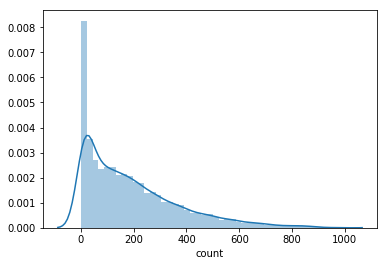

In [46]:
sns.distplot(train["count"])    # y값은 밀도(density)

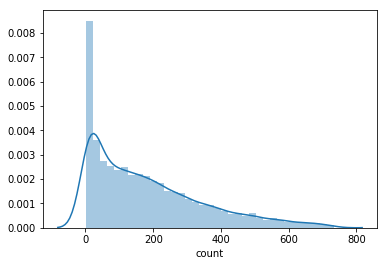

In [47]:
sns.distplot(trainWithoutOutliers["count"])

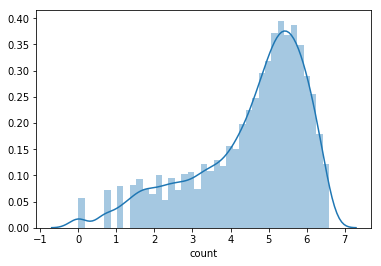

In [48]:
sns.distplot(np.log(trainWithoutOutliers["count"]))

랜덤포레스트 기반으로 Submission

랜덤포레스트 기반 예측

In [119]:
train = pd.read_csv("data/bike-sharing-demand/train.csv", parse_dates=["datetime"])
test = pd.read_csv("data/bike-sharing-demand/test.csv", parse_dates=["datetime"])
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [120]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek

train.shape

(10886, 19)

In [121]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek

test.shape

(6493, 16)

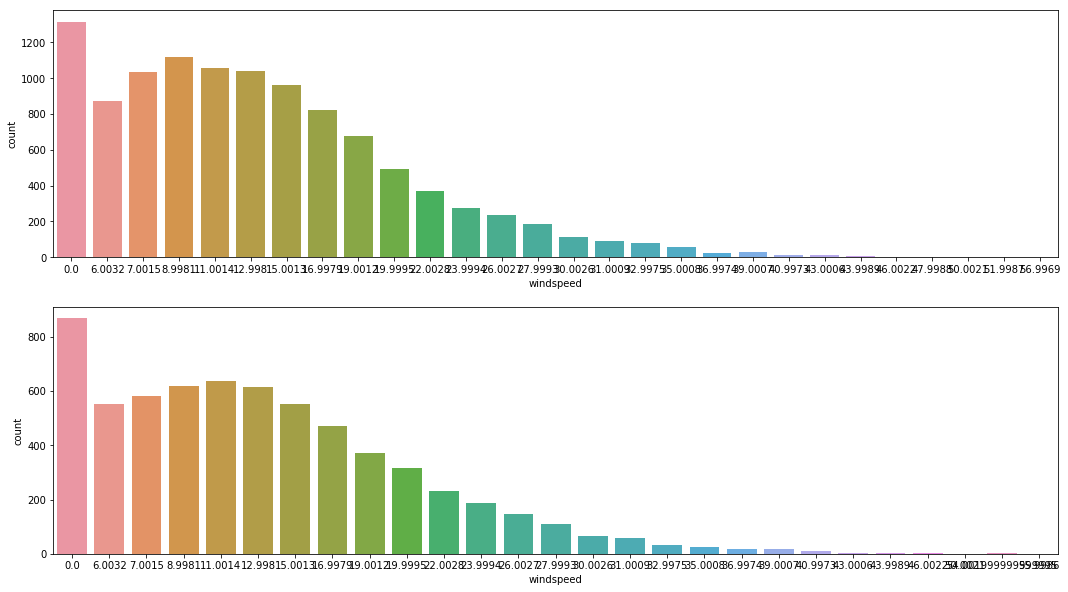

In [122]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)
sns.countplot(data=train, ax=axes[0], x="windspeed")
sns.countplot(data=test, ax=axes[1], x="windspeed")

In [123]:
# # 풍속이 0인 값을 일괄적으로 평균으로 대체
# train.loc[train["windspeed"]==0, "windspeed"] = train["windspeed"].mean()
# test.loc[test["windspeed"]==0, "windspeed"] = test["windspeed"].mean()

# 풍속이 0인 것은 trainWind0, 0이 아닌 것은 trainWindNot0에 저장
trainWind0 = train.loc[train["windspeed"]==0]
trainWindNot0 = train.loc[train["windspeed"]!=0]

print(trainWind0.shape)
print(trainWindNot0.shape)

(1313, 19)
(9573, 19)


풍속을 ML로 예측하여 결측값 처리

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
def predict_windspeed(data):
    dataWind0 = data.loc[data["windspeed"]==0]
    dataWindNot0 = data.loc[data["windspeed"]!=0]
    wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]
    
    # 풍속이 0이 아닌 데이터들의 타입을 str으로 변경
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    
    # 풍속이 0이 아닌 값으로 모델 생성
    rfModel_wind = RandomForestClassifier()
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])
    
    # 풍속이 0인 값들을 예측
    wind0Values = rfModel_wind.predict(X=dataWind0[wCol])
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    predictWind0["windspeed"] = wind0Values
    data = predictWindNot0.append(predictWind0)
    
    data["windspeed"] = data["windspeed"].astype("float")
    data.reset_index(inplace=True)
    
    return data

In [125]:
train = predict_windspeed(train)
test = predict_windspeed(test)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCo

In [126]:
print(train.shape)
train.info()
# print("=" * 50)
# print(test)

(10886, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
index         10886 non-null int64
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
day           10886 non-null int64
hour          10886 non-null int64
minute        10886 non-null int64
second        10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(16)
memory usage: 1.7 MB


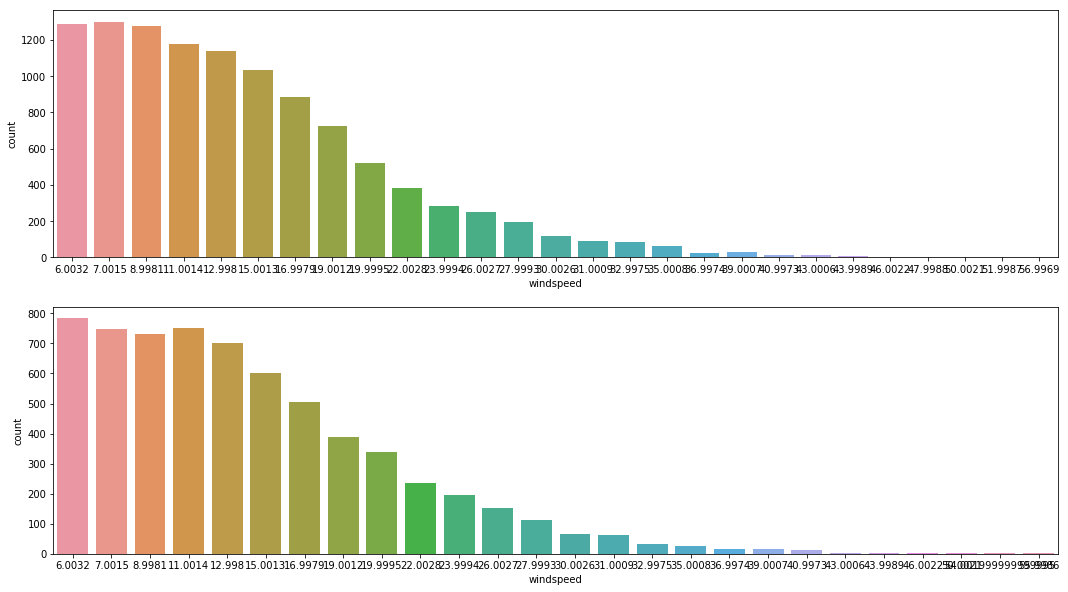

In [127]:
# x축은 풍속, y축은 count로 해서 train 데이터 시각화
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)
sns.countplot(data=train, ax=axes[0], x="windspeed")
sns.countplot(data=test, ax=axes[1], x="windspeed")

피처 선택

신호와 잡음 구분
* 피처가 무조건 많다고 해서 좋은 성능이 보장되지는 않음
* 피처를 하나씩 추가하면서(변경), 성능이 좋지 않은 피처는 제거

In [128]:
cfn = ["season", "holiday", "workingday", "weather", "dayofweek", "year", "month", "hour"]    # cfn: categorical feature name

In [129]:
for var in cfn:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [131]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, 
                               n_jobs=-1,    # n_jobs: cpu의 core를 몇개 쓸건지. -1로 설정하면 다 쓰는 것.
                               n_estimators=100)
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [ ]:
# model.fit(트레이닝x, 트레이닝y)
# # 예측
# 예측결과(count) = model.predict(테스트데이터의 x)
# submission["count"] = 예측결과(count)

model.fit()